## Example 5: Extractive Distillation

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import ipywidgets as widgets
from ipywidgets import interactive, Button, VBox, HBox, Output
from IPython.display import display
from IPython.display import clear_output

import utils.AntoineEquation as AE
from distillation.DistillationDoubleFeed import *
import ipywidgets as widgets

from thermo_models.VanLaarModel import *
from distillation.residue_curves import *
import pickle
from utils.dictionary_approx import *

with open("./utils/pickles/demo_3_acetmethwater_r.pkl", "rb") as f:
    demo_3_acetmethwater_r_dict = pickle.load(f)

with open("./utils/pickles/demo_3_ethanolwaterethylene_r.pkl", "rb") as f:
    demo_3_ethanolwaterethylene_r_dict = pickle.load(f)
    
with open("./utils/pickles/demo_4_fr_to_fixed_points_AceMethWaterSys.pkl", "rb") as f:
    demo_4_fr_to_fixed_points_AceMethWaterSys = pickle.load(f)
    
with open("./utils/pickles/demo_4_fr_to_fixed_points_ethanolwaterethylene.pkl", "rb") as f:
    demo_4_fr_to_fixed_points_ethanolwaterethylene = pickle.load(f)

In [3]:
#Acetone (1 - Light) Methanol (2 - Intermediate) Water (3 - Heavy)
#Table A.6 in Knapp 
A_ij = {
    (1,1):0,
    (1,2):182.0,
    (1,3):795.0,
    (2,1):196,
    (2,2):0,
    (2,3):332.6,
    (3,1):490.0,
    (3,2):163.80,
    (3,3):0
}

#Different definition of Antoine where we have to take the negative of B
Acet_A = 21.3099; Acet_B = 2801.53; Acet_C = -42.875
Meth_A = 23.4832; Meth_B = 3634.01; Meth_C = -33.768
#Assuming P < 2 atm
Water_A = 23.2256; Water_B = 3835.18; Water_C = -45.343

#Knapp Thesis Figure 3.8 uses ln form of Antoine
AcetoneAntoine = AE.AntoineEquationBaseE(Acet_A,Acet_B,Acet_C)
MethanolAntoine = AE.AntoineEquationBaseE(Meth_A, Meth_B, Meth_C)
WaterAntoine = AE.AntoineEquationBaseE(Water_A,Water_B,Water_C)
        
P_sys = 101325
# Create a Raoult's law object
AceMethWaterSys = VanLaarModel(num_comp = 3, P_sys = P_sys, A_coeff = A_ij, comp_names = ["Acetone","Methanol","Water"], partial_pressure_eqs = [AcetoneAntoine, MethanolAntoine, WaterAntoine])

In [4]:
#Ethanol (1 - Light) Water (2 - Intermediate) Ethylene Glycol (3 - Heavy)
#Table A.5 in Knapp, assuming P < 2 atm
A_ij_EWEG = {
    (1,1):0,
    (1,2):615.9,
    (1,3):277.3,
    (2,1):314,
    (2,2):0,
    (2,3):376.028,
    (3,1):892.7,
    (3,2):622.539,
    (3,3):0
}

#Different definition of Antoine where we have to take the negative of B
#Table A.4 in Knapp
#Assuming P < 2 atm
Eth_A = 23.5807; Eth_B = 3673.81; Eth_C = -46.681
Water_A = 23.2256; Water_B = 3835.18; Water_C = -45.343
EG_A = 25.1431; EG_B = 6022.18; EG_C = -28.25


#Knapp Thesis Figure 3.8 uses ln form of Antoine
EthanolAntoine = AE.AntoineEquationBaseE(Eth_A, Eth_B, Eth_C)
WaterAntoine = AE.AntoineEquationBaseE(Water_A, Water_B, Water_C)
EthyleneGlycolAntoine = AE.AntoineEquationBaseE(EG_A, EG_B, EG_C)
        
P_sys = 101325
# Create a Raoult's law object
EthWaterEGSys = VanLaarModel(num_comp = 3, P_sys = P_sys, A_coeff = A_ij_EWEG, comp_names = ["Ethanol","Water","Ethylene Glycol"], partial_pressure_eqs = [EthanolAntoine, WaterAntoine, EthyleneGlycolAntoine])

Integration stopped due to overflow, NaN values, or out-of-bound values.
Integration stopped due to overflow, NaN values, or out-of-bound values.
Integration stopped due to overflow, NaN values, or out-of-bound values.
Integration stopped due to overflow, NaN values, or out-of-bound values.


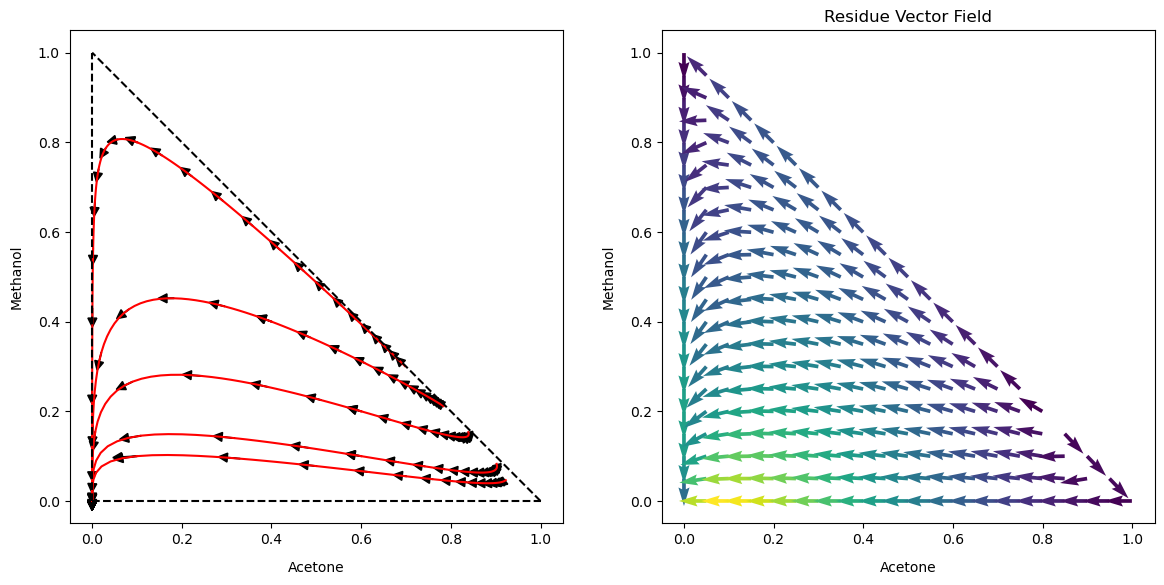

In [5]:
out_residue = Output()
rcm = PhasePortraits(thermo_model=AceMethWaterSys)
fig, ax = plt.subplots(1,2,figsize= (14,7))
rcm.plot_residue_curve(ax[0], [0,7],data_points = 100, 
                            init_comps = [ 
                                            np.array([0.4,0.4,0.2]),
                                            np.array([0.6,0.2,0.2]),
                                            np.array([0.6,0.1,0.3]),
                                            np.array([0.1,0.8,0.1]),
                                            np.array([0.1,0.1,0.8])
                                            ])
rcm.plot_vector_field_residue(ax[1])
for i in ax:
    i.set_aspect('equal')
plt.show()

In [6]:
# # RESIDUE CURVE FOR ETHANOL-WATER-ETHYLENE GLYCOL, HAS SOME OVERFLOW ##

# out_residue = Output()
# rcm = phase_portraits(thermo_model=EthWaterEGSys)
# fig, ax = plt.subplots(1,1,figsize= (7,7))
# rcm.plot_residue_curve(ax, [0,7],data_points = 1000, 
#                             init_comps = [ 
#                                             np.array([0.4,0.4,0.2]),
#                                             # np.array([0.6,0.2,0.2]),
#                                             # np.array([0.6,0.1,0.3]),
#                                             # np.array([0.1,0.8,0.1]),
#                                             # np.array([0.1,0.1,0.8])
#                                             ])
# plt.show()

### Demo 1.5: Comparing two Systems

Two systems are depicted in the graphs below.  Differences in the locations of the fixed points lead to different properties in the shapes of the operating curves.  These differences are highlighted at 3 sets of identical parameters:

A:  Notice how the middle section on the Acetone-Methanol-Water does not move in a direction that could connect the rectifying and stripping sections.  Instead, it curves upwards towards the saddle node, while the Ethanol-Water-Ethylene Glycol system is connected by its staple, resulting in a feasible column.

B: 

C:  Focus on the shapes of the Rectifying Sections.  The Acetone-Methanol-Water system is feasible because its rectifying section curves upwards and intersects the staple.  The Ethanol-Water-Ethylene Glycol system has a rectifying section with much fewer equilibrium stages, and it moves directly towards the stable Ethylene Glycol node.  As a result, the column is unfeasible

In [8]:
# Create an interactive plot function
def interactive_plot(system):
    if system == 'A':
        middle_start = 2
        Fr = 0.5
        R = 7

    if system == 'B':
        middle_start = 6
        R = 1.5     
        Fr = 1

    if system == 'C':
        middle_start = 9
        R = 1
        Fr = 2

    xFL = np.array([0.3, 0.6, 0.1])
    xFU = np.array([0.2, 0.1, 0.7])
    zF = (Fr/(1+Fr))*xFU + (1/(1+Fr))*xFL                                #Knapp Equation 5.9
    xD = np.array([0.90, 0.08, 0.02]) 
    D_B = ((zF[0] - 0.02) / (xD[0] - zF[0]))                             #Knapp Equation 5.13, set xB[0] = 0.01
    xB = np.array([0.02, (zF[1] - D_B*(xD[1]-zF[1])), (zF[2] - D_B*(xD[2]*zF[2]))])

    distillation_modelA = DistillationModelDoubleFeed(thermo_model=AceMethWaterSys, Fr = Fr, zF = zF, xFL = xFL, xFU = xFU, xD = xD, xB = xB, reflux = R)
    distillation_modelB = DistillationModelDoubleFeed(thermo_model=EthWaterEGSys, Fr = Fr, zF = zF, xFL = xFL, xFU = xFU, xD = xD, xB = xB, reflux = R)
    fig, axes = plt.subplots(2, 4, figsize=(24, 12))
    distillation_modelA.plot_rect_strip_comp(axes[0][0], middle_start=middle_start)
    rcmA = PhasePortraits(thermo_model=AceMethWaterSys, distil_model=distillation_modelA)
    rcmA.plot_vector_field_rect(axes[0][1]); rcmA.plot_vector_field_strip(axes[0][2]);rcmA.plot_vector_field_middle(axes[0][3])
    
    # axes[0][0].set_title('Acetone-Methanol-Water')
    distillation_modelB.plot_rect_strip_comp(axes[1][0], middle_start=middle_start)
    rcmB = PhasePortraits(thermo_model=EthWaterEGSys, distil_model=distillation_modelB)
    rcmB.plot_vector_field_rect(axes[1][1]); rcmB.plot_vector_field_strip(axes[1][2]);rcmB.plot_vector_field_middle(axes[1][3])
    # ax[1][0].set_title('Ethanol-Water-Ethylene Glycol')

    plt.tight_layout()
    plt.show()


system_widget = widgets.Dropdown(
    options=["A", "B", "C"],
    description='Demo Choice:',
    disabled=False
    ) 


# Create an interactive plot with the dropdown widget
interactive(interactive_plot, system=system_widget)

interactive(children=(Dropdown(description='Demo Choice:', options=('A', 'B', 'C'), value='A'), Output()), _do…

#### Demo 2

In [9]:
# Create an interactive plot function
def interactive_plot(system, middle_start):
    thermo_choice = AceMethWaterSys
    Fr = 0.5
    R = 3
    if system == 'Ethanol/Water/Ethylene Glycol':
        thermo_choice = EthWaterEGSys
        Fr = 0.23
        R = 6
    xFL = np.array([0.3, 0.6, 0.1])
    xFU = np.array([0.2, 0.1, 0.7])
    zF = (Fr/(1+Fr))*xFU + (1/(1+Fr))*xFL                                #Knapp Equation 5.9
    xD = np.array([0.93, 0.04, 0.03]) 
    D_B = ((zF[0] - 0.02) / (xD[0] - zF[0]))                             #Knapp Equation 5.13, set xB[0] = 0.01
    xB = np.array([0.02, (zF[1] - D_B*(xD[1]-zF[1])), (zF[2] - D_B*(xD[2]*zF[2]))])

    distillation_model = DistillationModelDoubleFeed(thermo_model=thermo_choice, Fr = Fr, zF = zF, xFL = xFL, xFU = xFU, xD = xD, xB = xB, reflux = R)
    fig, axes = plt.subplots(1, 4, figsize=(24, 6))
    distillation_model.plot_rect_strip_comp(axes[0], middle_start=middle_start)
    rcm = PhasePortraits(thermo_model=thermo_choice, distil_model=distillation_model)
    rcm.plot_vector_field_rect(axes[1]); rcm.plot_vector_field_strip(axes[2]);rcm.plot_vector_field_middle(axes[3])
    plt.tight_layout()
    plt.show()

# Create a dropdown widget for middle_start
middle_start_widget = widgets.Dropdown(
    options=[2, 4, 6, 8, 10],
    description='Middle Section Start:',
    disabled=False
)
system_widget = widgets.Dropdown(
    options=["Acetone/Methanol/Water","Ethanol/Water/Ethylene Glycol"],
    description='Components:',
    disabled=False
) 

# Create an interactive plot with the dropdown widget
interactive(interactive_plot, system=system_widget, middle_start=middle_start_widget)

interactive(children=(Dropdown(description='Components:', options=('Acetone/Methanol/Water', 'Ethanol/Water/Et…

### Demo 3
A maximum reflux ration exists, around R=60?

In [8]:
R_slider =  widgets.FloatSlider(value=1, min=0.6, max=20, step=0.001,  description='Reflux Ratio:', readout_format='.1f')
demo3_button = widgets.Button(description='Create Model', width='15%', margin='0 10px 0 0')
system_widget = widgets.Dropdown(
    options=["Acetone/Methanol/Water","Ethanol/Water/Ethylene Glycol"],
    description='Components:',
    disabled=False
    ) 
# Create a dropdown widget for middle_start
middle_start_widget = widgets.Dropdown(
    options=[2, 4, 6, 8, 10],
    description='Middle Section Start:',
    disabled=False
)
out_middle = Output()

def plot_reflux_demo_ex5(R = R_slider, thermo_system = system_widget.value, middle_start=6):
    thermo_choice = AceMethWaterSys
    Fr = 1.0
    fixed_points_dict = demo_3_acetmethwater_r_dict
    if thermo_system == 'Ethanol/Water/Ethylene Glycol':
        thermo_choice = EthWaterEGSys
        fixed_points_dict = demo_3_ethanolwaterethylene_r_dict
        Fr = 0.1
    xFL = np.array([0.3, 0.6, 0.1])
    xFU = np.array([0.2, 0.1, 0.7])
    zF = (Fr/(1+Fr))*xFU + (1/(1+Fr))*xFL                                #Knapp Equation 5.9
    xD = np.array([0.93, 0.04, 0.03]) 
    D_B = ((zF[0] - 0.02) / (xD[0] - zF[0]))                             #Knapp Equation 5.13, set xB[0] = 0.01
    xB = np.array([0.02, (zF[1] - D_B*(xD[1]-zF[1])), (zF[2] - D_B*(xD[2]*zF[2]))])

    distillation_model = DistillationModelDoubleFeed(thermo_model = thermo_choice, Fr = Fr, zF = zF, xFL = xFL, xFU = xFU, xD = xD, xB = xB, reflux = R)
    fig, ax = plt.subplots(1,2,figsize= (20,10))
    distillation_model.plot_rect_strip_comp(ax[0], middle_start=middle_start)
    middle_sect_vector_field = PhasePortraits(thermo_model=thermo_choice,distil_model=distillation_model)
    middle_sect_vector_field.plot_vector_field_middle(ax[1],20)
    #add the vector field pltos that changes with R
    

    for subplots in ax:
        subplots.set_aspect('equal')
       
    ##youre working here 
    fixed_points = approximate_value(fixed_points_dict,R)
    for index,point in enumerate(fixed_points['values']):
        ax[0].scatter(point[0], point[1], marker='x', color='black', s=100, linewidths= 10)
        ax[1].scatter(point[0], point[1], marker='x', color='black', s=100, linewidths= 10)
    print(fixed_points['values'])
    plt.subplots_adjust(hspace=0)
    plt.show()

def demo3_button_click(b):
    with out_middle:
        clear_output(wait=True)
        plt.close('all')  # Close all open matplotlib plots
        plot_reflux_demo_ex5(R=R_slider.value, thermo_system=system_widget.value, middle_start = middle_start_widget.value)
        
demo3_button = Button(description='Generate Plot')
demo3_button.on_click(demo3_button_click)

layout3 = VBox([system_widget,middle_start_widget, HBox([R_slider, demo3_button]), out_middle])
display(layout3)

### Demo 4
Changing Feed Ratio

In [9]:
Fr_slider =  widgets.FloatLogSlider(value=0.64, min=-1, max=1, step=0.001,  description='Feed Ratio:', readout_format='.2f')
demo4_button = widgets.Button(description='Create Model', width='15%', margin='0 10px 0 0')
system_widget = widgets.Dropdown(
    options=["Acetone/Methanol/Water","Ethanol/Water/Ethylene Glycol"],
    description='Components:',
    disabled=False
    ) 
# Create a dropdown widget for middle_start
middle_start_widget = widgets.Dropdown(
    options=[2, 4, 6, 8, 10],
    description='Middle Section Start:',
    disabled=False
)
out_middle = Output()

def plot_reflux_demo_ex5_demo4(Fr = Fr_slider, thermo_system = system_widget.value, middle_start=6):
    thermo_choice = AceMethWaterSys
    R = 1.35
    fixed_points_dict = demo_4_fr_to_fixed_points_AceMethWaterSys
    if thermo_system == 'Ethanol/Water/Ethylene Glycol':
        fixed_points_dict = demo_4_fr_to_fixed_points_ethanolwaterethylene
        thermo_choice = EthWaterEGSys
        R = 6
    xFL = np.array([0.3, 0.6, 0.1])
    xFU = np.array([0.2, 0.1, 0.7])
    zF = (Fr/(1+Fr))*xFU + (1/(1+Fr))*xFL                                #Knapp Equation 5.9
    xD = np.array([0.93, 0.04, 0.03]) 
    D_B = ((zF[0] - 0.02) / (xD[0] - zF[0]))                             #Knapp Equation 5.13, set xB[0] = 0.01
    xB = np.array([0.02, (zF[1] - D_B*(xD[1]-zF[1])), (zF[2] - D_B*(xD[2]*zF[2]))])
        ##youre working here 
        

    distillation_model = DistillationModelDoubleFeed(thermo_model = thermo_choice, Fr = Fr, zF = zF, xFL = xFL, xFU = xFU, xD = xD, xB = xB, reflux = R)
    fig, ax = plt.subplots(1,2,figsize= (20,10))
    distillation_model.plot_rect_strip_comp(ax[0], middle_start=middle_start)
    middle_sect_vector_field = PhasePortraits(thermo_model=thermo_choice,distil_model=distillation_model)
    middle_sect_vector_field.plot_vector_field_middle(ax[1],20)
    
    fixed_points = approximate_value(fixed_points_dict,Fr)
    for index,point in enumerate(fixed_points['values']):
        ax[0].scatter(point[0], point[1], marker='x', color='black', s=100, linewidths= 10)
        ax[1].scatter(point[0], point[1], marker='x', color='black', s=100, linewidths= 10)
    print(fixed_points['values'])
    
    for subplots in ax:
        subplots.set_aspect('equal')
    plt.subplots_adjust(hspace=0)
    plt.show()


def demo4_button_click(b):
    with out_middle:
        clear_output(wait=True)
        plt.close('all')  # Close all open matplotlib plots
        plot_reflux_demo_ex5_demo4(Fr=Fr_slider.value, thermo_system=system_widget.value, middle_start = middle_start_widget.value)
        
demo4_button = Button(description='Generate Plot')
demo4_button.on_click(demo4_button_click)

layout = VBox([system_widget,middle_start_widget, HBox([Fr_slider, demo4_button]), out_middle])
display(layout)

Integration stopped due to overflow, NaN values, or out-of-bound values.
Integration stopped due to overflow, NaN values, or out-of-bound values.
Integration stopped due to overflow, NaN values, or out-of-bound values.
Integration stopped due to overflow, NaN values, or out-of-bound values.
Integration stopped due to overflow, NaN values, or out-of-bound values.
Integration stopped due to overflow, NaN values, or out-of-bound values.
Integration stopped due to overflow, NaN values, or out-of-bound values.
Integration stopped due to overflow, NaN values, or out-of-bound values.
Integration stopped due to overflow, NaN values, or out-of-bound values.
Integration stopped due to overflow, NaN values, or out-of-bound values.
Integration stopped due to overflow, NaN values, or out-of-bound values.
Integration stopped due to overflow, NaN values, or out-of-bound values.
Integration stopped due to overflow, NaN values, or out-of-bound values.
Integration stopped due to overflow, NaN values, or

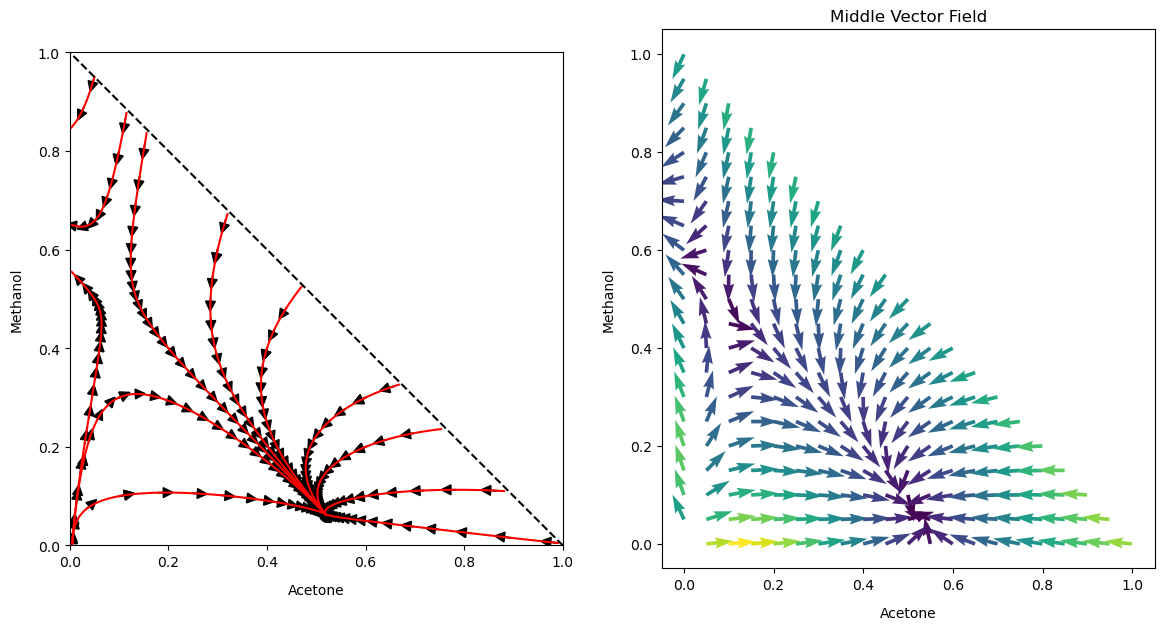

In [11]:
out_middle_phase_portrait = Output()
Fr = 1.0
xFL = np.array([0.3, 0.6, 0.1])
xFU = np.array([0.2, 0.1, 0.7])
zF = (Fr/(1+Fr))*xFU + (1/(1+Fr))*xFL                                #Knapp Equation 5.9
xD = np.array([0.93, 0.04, 0.03]) 
D_B = ((zF[0] - 0.02) / (xD[0] - zF[0]))                             #Knapp Equation 5.13, set xB[0] = 0.01
xB = np.array([0.02, (zF[1] - D_B*(xD[1]-zF[1])), (zF[2] - D_B*(xD[2]*zF[2]))])
R = 3
distillation_model = DistillationModelDoubleFeed(thermo_model=AceMethWaterSys, Fr = Fr, zF = zF, xFL = xFL, xFU = xFU, xD = xD, xB = xB, reflux = R)
rcm = PhasePortraits(thermo_model=AceMethWaterSys, distil_model=distillation_model)
fig, ax = plt.subplots(1,2,figsize= (14,7))
rcm.plot_middle_portrait(ax[0], [0,7],data_points = 200, 
                            init_comps = [ 
                                            np.array([0.4,0.4,0.2]),
                                            np.array([0.6,0.2,0.2]),
                                            np.array([0.6,0.1,0.3]),
                                            np.array([0.1,0.8,0.1]),
                                            np.array([0.2,0.4,0.4]),
                                            np.array([0.1,0.1,0.8]),
                                            np.array([0.1,0.3,0.6]),
                                            np.array([0.3,0.6,0.1]),
                                            np.array([0.6,0.3,0.1]),
                                            np.array([0.99,0.005,0.005]),
                                            np.array([0.05,0.95,0.00]),
                                            np.array([0.05,0.5,0.45]),
                                            ])
rcm.plot_vector_field_middle(ax[1])
plt.show()